# REGRESIÓN CON VECTORES DE SOPORTE - CEREBROS HUMANOS

En este laboratorio mi objetivo principal es entrenar el modelo de regresión por vectores de soporte.Este modelo generalmente se emplea como un metodo de clasificacion, aunque también es posible utilizarlo como un modelo de regresion. Para el desarrollo este laboratorio emplearé una base de datos obtenida de la plataforma Kaggle (https://www.kaggle.com/datasets/anubhabswain/brain-weight-in-humans?select=dataset.csv). Esta base de datos contiene infomarción sobre el peso del cerebro de los humanos y otras variables (volumen de la cabeza, sexo, y rango de edad). Como la regresión simple es un modelo que se emplea para entender las relaciones entre dos variables continuas, intentaré obtener un modelo con el que predecir el peso del cerebro en función del volumen de la cabeza de las personas. Considero que tiene más sentido emplear el volumen de la cabeza como variable independiente ya que entre las dos medidas es la menos invasiva, tanto es así, que no podemos esperar obtener el peso de un cerebro de un humano y que este permanezca con vida. 

### Importamos las librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado de datos y modelado 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


### Carga y limpieza de la base de datos

In [2]:
# Cargamos la base de datos como un dataframe
df_cerebros = pd.read_csv("Brain_weight_humans.csv")

# Visualizamos las primeras lineas para hacernos una idea de los datos:
print(df_cerebros.head(5))

# Tenemos una variable categorica nomimal (gender -> sexo)
# Una variable categorica ordinal (Age range)
# Dos variables continuas (Head Size y Braing Weight)


# Cambiamos las cabeceras por unas en castellano y más cortas: 
df_cerebros.rename(columns={"Gender" : "Sexo"},inplace=True)
df_cerebros.rename(columns={"Age range" : "Grupo_etario"},inplace=True)
df_cerebros.rename(columns={"Head Size(cm^3)" : "Volumen_cabeza"},inplace=True)
df_cerebros.rename(columns={"Brain Weight(grams)" : "Peso_cerebro"},inplace=True)

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [3]:
# Echamos una ojeada a las estadisticas descriptivas de nuestros datos
print(df_cerebros.describe())


             Sexo   Age Range  Volumen_cabeza  Peso_cerebro
count  237.000000  237.000000      237.000000    237.000000
mean     1.434599    1.535865     3633.991561   1282.873418
std      0.496753    0.499768      365.261422    120.340446
min      1.000000    1.000000     2720.000000    955.000000
25%      1.000000    1.000000     3389.000000   1207.000000
50%      1.000000    2.000000     3614.000000   1280.000000
75%      2.000000    2.000000     3876.000000   1350.000000
max      2.000000    2.000000     4747.000000   1635.000000


Tenemos 237 registros, no se identifican valores nulos y los valores de los cuartiles, la media y la desviación estandar parecer indicar una distribucion normal tanto del Volumen de la Cabeza como el Peso del Cerebro. A priori, no parece necesario hacer una limpieza de los datos; aun así, me gustaría visualizar la distribución de estos datos. 

<AxesSubplot:xlabel='Peso_cerebro'>

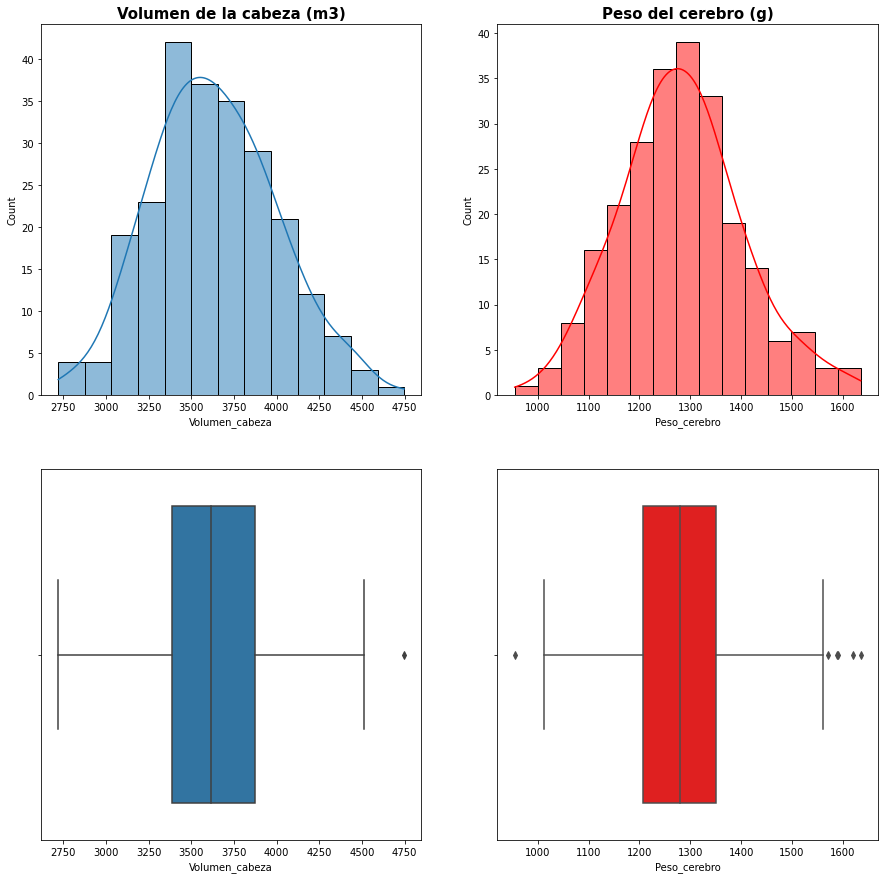

In [4]:
fig, axs = plt.subplots(ncols= 2, nrows =2,figsize=(15,15))

# Graficamos los datos del volumen de la cabeza
axs[0,0].set_title('Volumen de la cabeza (m3)', fontsize = 15, fontweight = "bold")
sns.boxplot(data=df_cerebros, x="Volumen_cabeza", ax=axs[1,0])
sns.histplot(data=df_cerebros, x="Volumen_cabeza", kde=True,ax=axs[0,0])


# Graficamos los datos del peso del cerebro
axs[0,1].set_title('Peso del cerebro (g)', fontsize = 15, fontweight = "bold")
sns.histplot(data=df_cerebros, x="Peso_cerebro", color ="r", kde=True,ax=axs[0,1])
sns.boxplot(data=df_cerebros, x="Peso_cerebro", color ="r",ax=axs[1,1])

Como comentabamos en la descripción preliminar de los datos, la distribución parece razonablemente normal, con algunos "outliers" en el peso del cerebro. 

También quiero visualizar preliminarmente como se distribuyen los datos del peso del cerebro con respecto al volumen del craneo

<AxesSubplot:xlabel='Volumen_cabeza', ylabel='Peso_cerebro'>

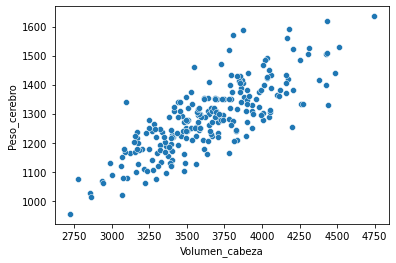

In [5]:
sns.scatterplot(data=df_cerebros, x="Volumen_cabeza", y="Peso_cerebro", legend="full")

La visualización previa de la dispersión de los datos muestra que un modelo de regresión múltiple puede ser muy prometedora para inferir el peso del cerebro en funcion del volumen de la cabeza

## REGRESION LINEAL CON MAQUINA DE SOPORTE DE VECTORES

### Generación del modelo

Primero debemos generar un vector con nuestras variables y divir los datos en un grupo de entrenamiento y otro de evaluación. 

In [6]:
# Generamos nuestras variables, queremos explicar el precio del cerebro en función del volumen de la cabeza.
y = df_cerebros['Peso_cerebro']
X = df_cerebros['Volumen_cabeza'].values.reshape(-1,1)
# Redimesionamos las variable X para que la acepte la función LinearRegression()


# Dividimos los datos en un grupo de entrenamiento y uno de evaluación. Dejamos un 30% de los datos para evaluar el modelo
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# Random_state nos creara una semilla aleatoria para tener el mismo resultado cada vez que corramos el codigo

Entrenamos el modelo: 

In [7]:
rsvm = SVR(kernel='linear', C=1, epsilon=0.2) # Definimos el algoritmo
rsvm.fit(x_train, y_train) # Entrenamos el algoritmo

SVR(C=1, epsilon=0.2, kernel='linear')

Hacemos predicciones con el modelo

In [8]:
predichos = rsvm.predict(x_test)

Graficamos nuestras predicciones de nuestro modelo con los datos reales

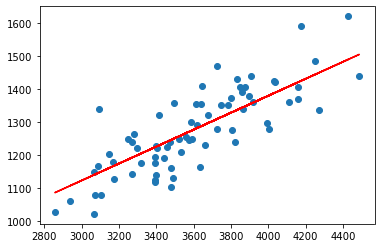

In [9]:
plt.scatter(x_test, y_test)
plt.plot(x_test, predichos, color='red')
plt.show()

Evaluamos la precision del modelo